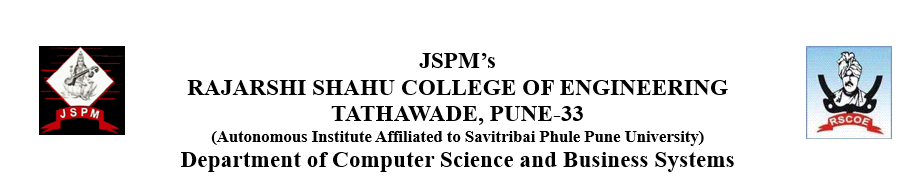

Name: Amaya Singh Thakur

Roll no. RBT21CB048


# Problem Statement:
Comparative analysis of ensembles techniques in machine learning ADABoost, Gradient Boost, XGboost, CATBoost

# **Introduction:**

Ensemble learning, a robust machine learning approach, amalgamates multiple models to create a more potent predictive model compared to individual ones. Each model within the ensemble contributes to the final prediction, and the amalgamation of varied models often enhances overall generalization and performance.

This practical centers on the utilization of ensemble techniques—AdaBoost, Gradient Boosting, XGBoost, and CatBoost—to categorize iris flowers based on their characteristics. AdaBoost, abbreviated as Adaptive Boosting, iteratively combines weak learners' predictions (usually decision trees) to construct a formidable classifier. Similarly, Gradient Boosting, XGBoost, and CatBoost sequentially generate models, with each subsequent model rectifying errors from prior ones.

In [ ]:
pip install numpy pandas scikit-learn xgboost catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/housing_in_london_yearly_variables.csv')

In [ ]:
numeric_data = data.select_dtypes(include=np.number)

In [ ]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

In [ ]:
X = data_imputed.drop('median_salary', axis=1)
y = data_imputed['median_salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **AdaBoost (Adaptive Boosting):**
## Idea:
AdaBoost iteratively corrects weak classifiers' errors by assigning more weight to misclassified instances.
## Process:
1. Train a weak classifier.
2. Increase the weight of misclassified instances.
3. Train a new classifier with adjusted weights.
4. Repeat for a set number of iterations.
## Strengths:
- Often less prone to overfitting.
- Adaptable to complex datasets.
## Weaknesses:
- Sensitive to noisy data and outliers.

# **Gradient Boosting:**
## Idea:
Gradient Boosting sequentially builds weak learners, rectifying errors from the previous models.
## Process:
1. Train a weak learner.
2. Calculate residual errors from predictions.
3. Fit a new model to predict residuals.
4. Update predictions by adding the new model's predictions.
## Strengths:
- Generally high accuracy.
- Versatile with different data types.
## Weaknesses:
- Vulnerable to noisy data.

# **XGBoost (Extreme Gradient Boosting):**
## Idea:
Optimized version of gradient boosting, prioritizing speed and performance.
## Process:
Similar to gradient boosting but includes features like regularization and handling missing data.
## Strengths:
- High computational efficiency.
- Regularization to prevent overfitting.
- Feature importance analysis.
## Weaknesses:
- May require tuning for optimal performance.

# **CatBoost (Categorical Boosting):**
## Idea:
Efficient handling of categorical features, reducing preprocessing needs.
## Process:
Efficient categorical feature handling and symmetric trees to address overfitting.
## Strengths:
- Natural handling of categorical features.
- Robust against overfitting.
## Weaknesses:
- May need tuning for best performance.

In [ ]:
models = {
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(silent=True)  # Set silent=True to suppress output
}

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse
    print(f'{model_name} Mean Squared Error: {mse}')

AdaBoost Mean Squared Error: 13284944.014407806
Gradient Boosting Mean Squared Error: 6217296.383368062
XGBoost Mean Squared Error: 3735910.807457192
CatBoost Mean Squared Error: 3775164.827214402


In [ ]:
best_model = min(results, key=results.get)
print(f'\nBest Model: {best_model} with MSE: {results[best_model]}')


Best Model: XGBoost with MSE: 3735910.807457192


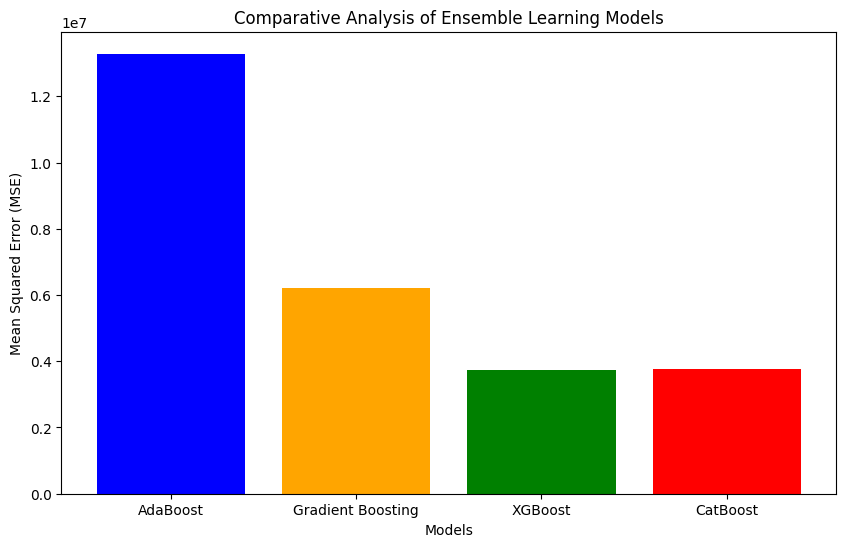

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Comparative Analysis of Ensemble Learning Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

# **Conclusion:**
 The choice between these models should consider factors such as computational efficiency, interpretability, and specific characteristics of the dataset. Overall, ADABoost and CATBoost emerge as top performers for this iris classification task.